Trains a Neural Network using the Data-Generator.

In [1]:
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from datagenerator import DataGenerator

/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Hyper-parameters.

In [2]:
if os.path.exists("datasetpath.txt"):
    dataset_path = open("datasetpath.txt", "r").read().replace("\n", "")
else:
    dataset_path = "../data"

train_size = 500
validate_size = 100

# Instantiate the data-generator.

In [4]:
data_generator = DataGenerator(dataset_path=dataset_path, input_type="image", output_targets=["height", "weight"])

print("jpg_paths", len(data_generator.jpg_paths))
print("pcd_paths", len(data_generator.pcd_paths))
print("json_paths_personal", len(data_generator.json_paths_personal))
print("json_paths_measures", len(data_generator.json_paths_measures))
print("QR-Codes:\n" + "\n".join(data_generator.qrcodes))

print("Done.")

jpg_paths 4511
pcd_paths 1360
json_paths_personal 40
json_paths_measures 74
QR-Codes:
SAM-02-003-01
SAM-GOV-001
SAM-GOV-002
SAM-GOV-003
SAM-GOV-004
SAM-GOV-005
SAM-GOV-008
SAM-GOV-011
SAM-GOV-012
SAM-GOV-013
SAM-GOV-014
SAM-GOV-023
SAM-GOV-025
SAM-GOV-026
SAM-GOV-033
SAM-GOV-034
SAM-GOV-035
SAM-GOV-036
SAM-GOV-037
SAM-GOV-038
SAM-GOV-041
SAM-GOV-042
SAM-GOV-043
SAM-GOV-044
SAM-GOV-099
SAM-SNG-011
SAM-SNG-012
SAM-SNG-013
SAM-SNG-014
SAM-SNG-015
SAM-SNG-016
SAM-SNG-021
SAM-SNG-036
SAM-SNG-066
SAM-SNG-067
SAM-SNG-072
SAM-SNG-091
SAM-SNG-096
Done.


#  Generate training- and validation-data.

In [5]:
qrcodes_shuffle = list(data_generator.qrcodes)
random.shuffle(qrcodes_shuffle)
split_index = int(0.8 * len(qrcodes_shuffle))
qrcodes_train = qrcodes_shuffle[:split_index]
qrcodes_validate = qrcodes_shuffle[split_index:]

print("Done.")

  0% (3 of 500) |                         | Elapsed Time: 0:00:00 ETA:  0:00:19

Training data:


100% (500 of 500) |#######################| Elapsed Time: 0:00:31 Time: 0:00:31
  3% (3 of 100) |                         | Elapsed Time: 0:00:00 ETA:  0:00:04

(500, 90, 160, 3)
(500, 2)

Validation data:


100% (100 of 100) |#######################| Elapsed Time: 0:00:07 Time: 0:00:07


(100, 90, 160, 3)
(100, 2)

(500, 90, 160, 3)
(500, 2)
(100, 90, 160, 3)
(100, 2)
Done.


# Train a net.

In [12]:
model = models.Sequential()

model.add(layers.Flatten(input_shape=(90, 160, 3)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(2))
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["mae"]
)

history = model.fit_generator(
    data_generator.generate(size=20, qrcodes_to_use=qrcodes_train),
    steps_per_epoch=10,
    epochs=10,
    validation_data=data_generator.generate(size=10, qrcodes_to_use=qrcodes_validate),
    validation_steps=10
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 43200)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               5529728   
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 130       
Total params: 5,538,114
Trainable params: 5,538,114
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
10/10 [==============================] - 19s 2s/step - loss: 51052444.2441 - mean_absolute_error: 3966.1195 - val_loss: 2207107.3000 - val_mean_absolute_error: 1254.6950
Epoch 2/10
10/10 [==============================] - 12s 1s/step - loss: 3343685.725

# Visualize results.

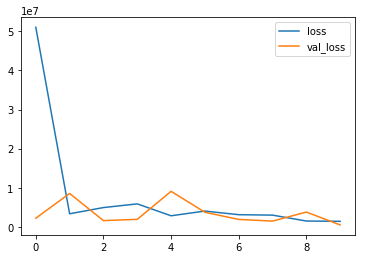

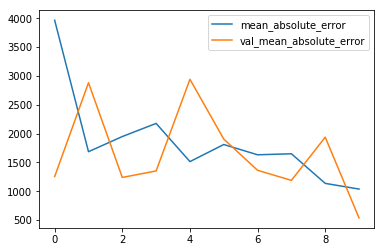

In [13]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["mean_absolute_error"], label="mean_absolute_error")
plt.plot(history.history["val_mean_absolute_error"], label="val_mean_absolute_error")
plt.legend()
plt.show()
plt.close()